데이터 불러오기

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

msno(사용자 아이디) => 숫자로 변환(정수형)
is churn (타겟 데이터)
is back (재가입)
-- 처음 가입한 고객은 : 0
-- 현재 재가입시 : 1
payment_plan_sum (아이디 별 총 구독 기간)
plan_list_price (아이디 별 합산)
actual_amount_paid (아이디 별 합산)


아이디별 평균 할인률 (5,6번 컬럼 이용)
is_auto_renew (자동 갱신 비율)
9.membership_expire_date(아이디별 가장 마지막 날짜)
is_cancle (비율)
거래 횟수 (아이디별 count)
도시
bd = age (이상치 전처리 필요)
성별
registered_via : 등록 방법
registration_init_time (가입 날짜로 추정됨)
17.

로그 데이터 (사용자별)
아이디별 가장 오래된 날짜
아이디별 가장 최근 날짜
num_25 평균
num_50 평균
num_75 평균
num_985 평균
num_100 평균
num_unq 평균
total_secs 평균
사용자별 로그가 찍힌 횟수

결측값 처리 (at least)
이상치 처리 (at least)
eda

In [ ]:
# data_dir = 'C:\\KIMUJUNG\\team_project\\data\\'
# df = pd.read_csv(data_dir + "kkbox_data_not_log.csv")
# df.head(3)

,msno_encoded,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,membership_expire_date,is_cancel,transaction_count
0,94959,1,0,NaN,7,20110914,0,0,870,3981,4130,0.0,1.0,20170428,0.033333,30
1,6597367,4,30,male,9,20110916,0,0,603,2980,3129,0.0,1.0,20170517,0.000000,21
2,3629318,5,34,male,9,20110916,1,0,360,1072,1072,0.0,0.0,20170823,0.000000,2


In [54]:
data_dir = 'C:\\KIMUJUNG\\team_project\\data\\'
df = pd.read_csv(data_dir + "kkbox_data_total.csv")
df.head(3)

,msno,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,log_start,log_end
0,94959,1,0,NaN,7,20110914,0,0,870,3981,...,30,11509,1551,1074,1030,26891,29141,7395726.684,20150101,20170331
1,6597367,4,30,male,9,20110916,0,0,603,2980,...,21,77,22,16,44,658,287,171508.646,20150209,20170331
2,3629318,5,34,male,9,20110916,1,0,360,1072,...,2,145,84,58,42,1678,1158,448313.054,20160822,20170330


In [55]:
df.shape

(955126, 25)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955126 entries, 0 to 955125
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    955126 non-null  int64  
 1   city                    955126 non-null  int64  
 2   bd                      955126 non-null  int64  
 3   gender                  440263 non-null  object 
 4   registered_via          955126 non-null  int64  
 5   registration_init_time  955126 non-null  int64  
 6   is_churn                955126 non-null  int64  
 7   is_back                 955126 non-null  int64  
 8   payment_plan_sum        955126 non-null  int64  
 9   plan_list_price         955126 non-null  int64  
 10  actual_amount_paid      955126 non-null  int64  
 11  discount_rate           954132 non-null  float64
 12  is_auto_renew           955126 non-null  float64
 13  membership_expire_date  955126 non-null  int64  
 14  is_cancel           

In [57]:
df.describe()

,msno,city,bd,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,actual_amount_paid,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,log_start,log_end
count,9.551260e+05,955126.000000,955126.000000,955126.000000,9.551260e+05,955126.000000,955126.000000,955126.000000,955126.000000,955126.000000,...,955126.000000,955126.000000,955126.000000,955126.000000,955126.000000,955126.000000,955126.000000,9.551260e+05,9.551260e+05,9.551260e+05
mean,3.384751e+06,6.016958,13.761469,6.852423,2.013295e+07,0.129238,0.005514,508.550749,2283.822352,2355.639321,...,16.525681,1897.506513,471.333770,294.599138,327.666536,8914.875466,8766.059226,-3.527107e+14,2.015468e+07,2.016950e+07
std,1.952704e+06,6.460329,19.939067,1.983412,2.989780e+04,0.335464,0.074054,252.838492,1258.126418,1314.588771,...,8.976219,3015.840757,655.323979,397.869997,544.004116,13057.715790,11091.705469,4.179253e+15,6.053442e+03,3.144336e+03
min,1.200000e+01,1.000000,-3152.000000,3.000000,2.004033e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.271893e+17,2.015010e+07,2.015010e+07
25%,1.695242e+06,1.000000,0.000000,7.000000,2.012023e+07,0.000000,0.000000,300.000000,1260.000000,1223.000000,...,9.000000,290.000000,79.000000,50.000000,50.000000,1271.000000,1468.000000,3.123213e+05,2.015010e+07,2.017032e+07
50%,3.384340e+06,1.000000,0.000000,7.000000,2.014062e+07,0.000000,0.000000,510.000000,2213.000000,2210.000000,...,17.000000,934.000000,252.000000,162.000000,166.000000,4644.000000,5028.000000,1.184527e+06,2.015081e+07,2.017033e+07
75%,5.072658e+06,13.000000,27.000000,9.000000,2.016012e+07,0.000000,0.000000,750.000000,3408.000000,3483.000000,...,24.000000,2373.000000,615.000000,391.000000,413.000000,11564.000000,12025.000000,2.971001e+06,2.016050e+07,2.017033e+07
max,6.769459e+06,22.000000,2016.000000,13.000000,2.017033e+07,1.000000,1.000000,3550.000000,17433.000000,17433.000000,...,244.000000,958237.000000,41141.000000,39071.000000,56454.000000,455135.000000,285048.000000,9.223372e+15,2.017033e+07,2.017033e+07


In [60]:
df.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'is_churn', 'is_back', 'payment_plan_sum',
       'plan_list_price', 'actual_amount_paid', 'discount_rate',
       'is_auto_renew', 'membership_expire_date', 'is_cancel',
       'transaction_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'log_start', 'log_end'],
      dtype='object')

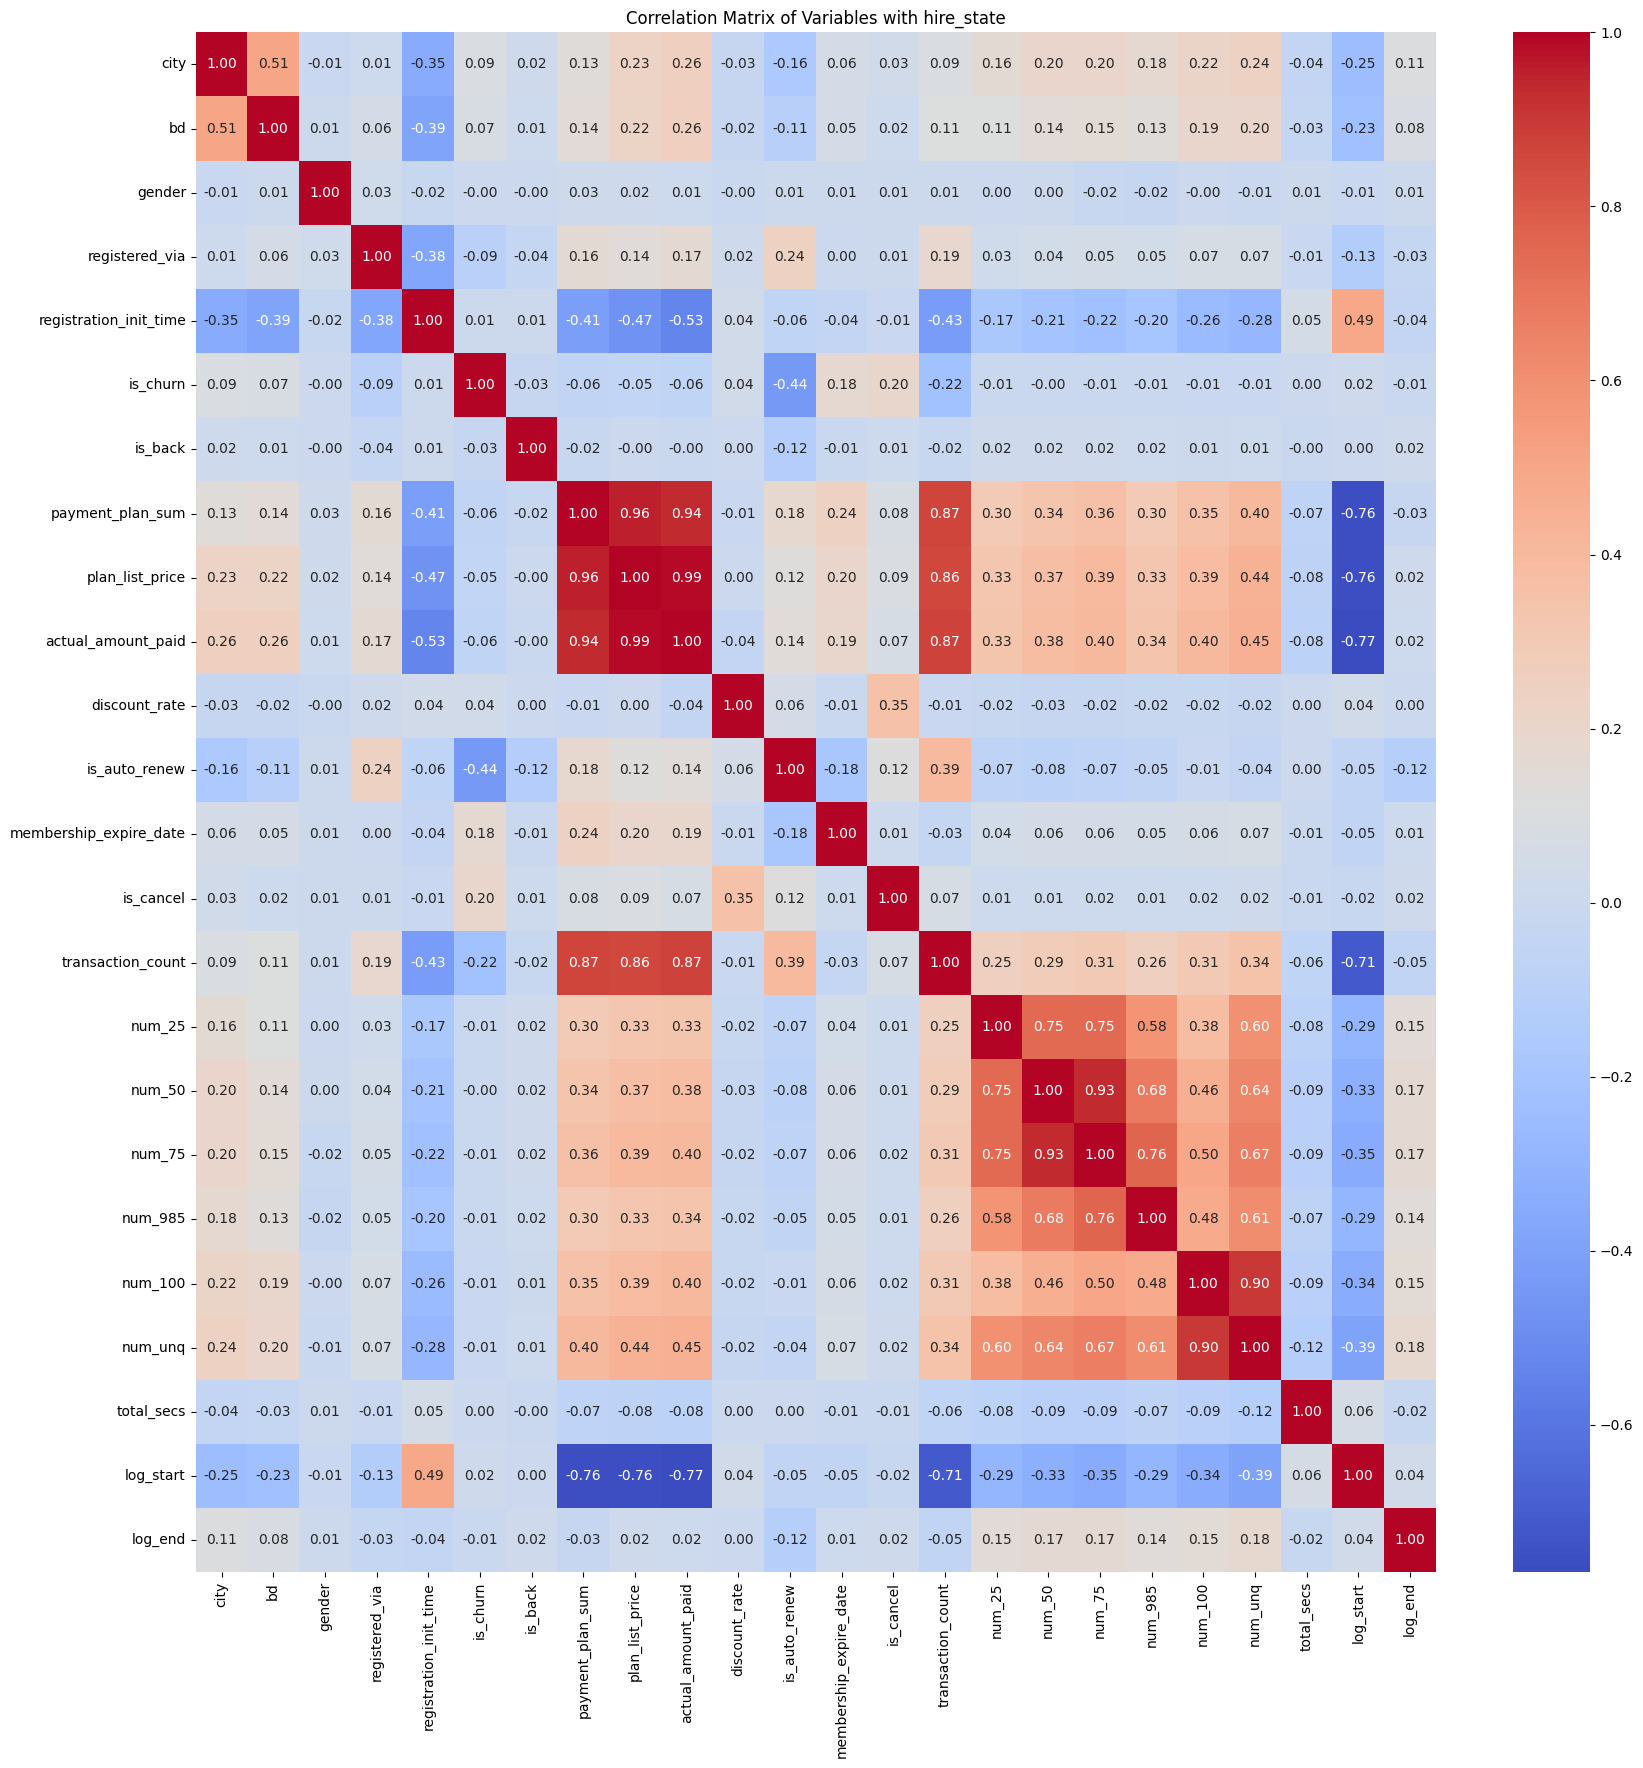

In [63]:
# 상관관계 분석에 사용할 변수들을 선택합니다.
corr_cols = ['city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'is_churn', 'is_back', 'payment_plan_sum',
       'plan_list_price', 'actual_amount_paid', 'discount_rate',
       'is_auto_renew', 'membership_expire_date', 'is_cancel',
       'transaction_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'log_start', 'log_end']

# 선택한 변수들 간의 상관관계를 계산합니다.
corr_matrix = df[corr_cols].corr()

# 히트맵을 그립니다.
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables with hire_state')
plt.show()

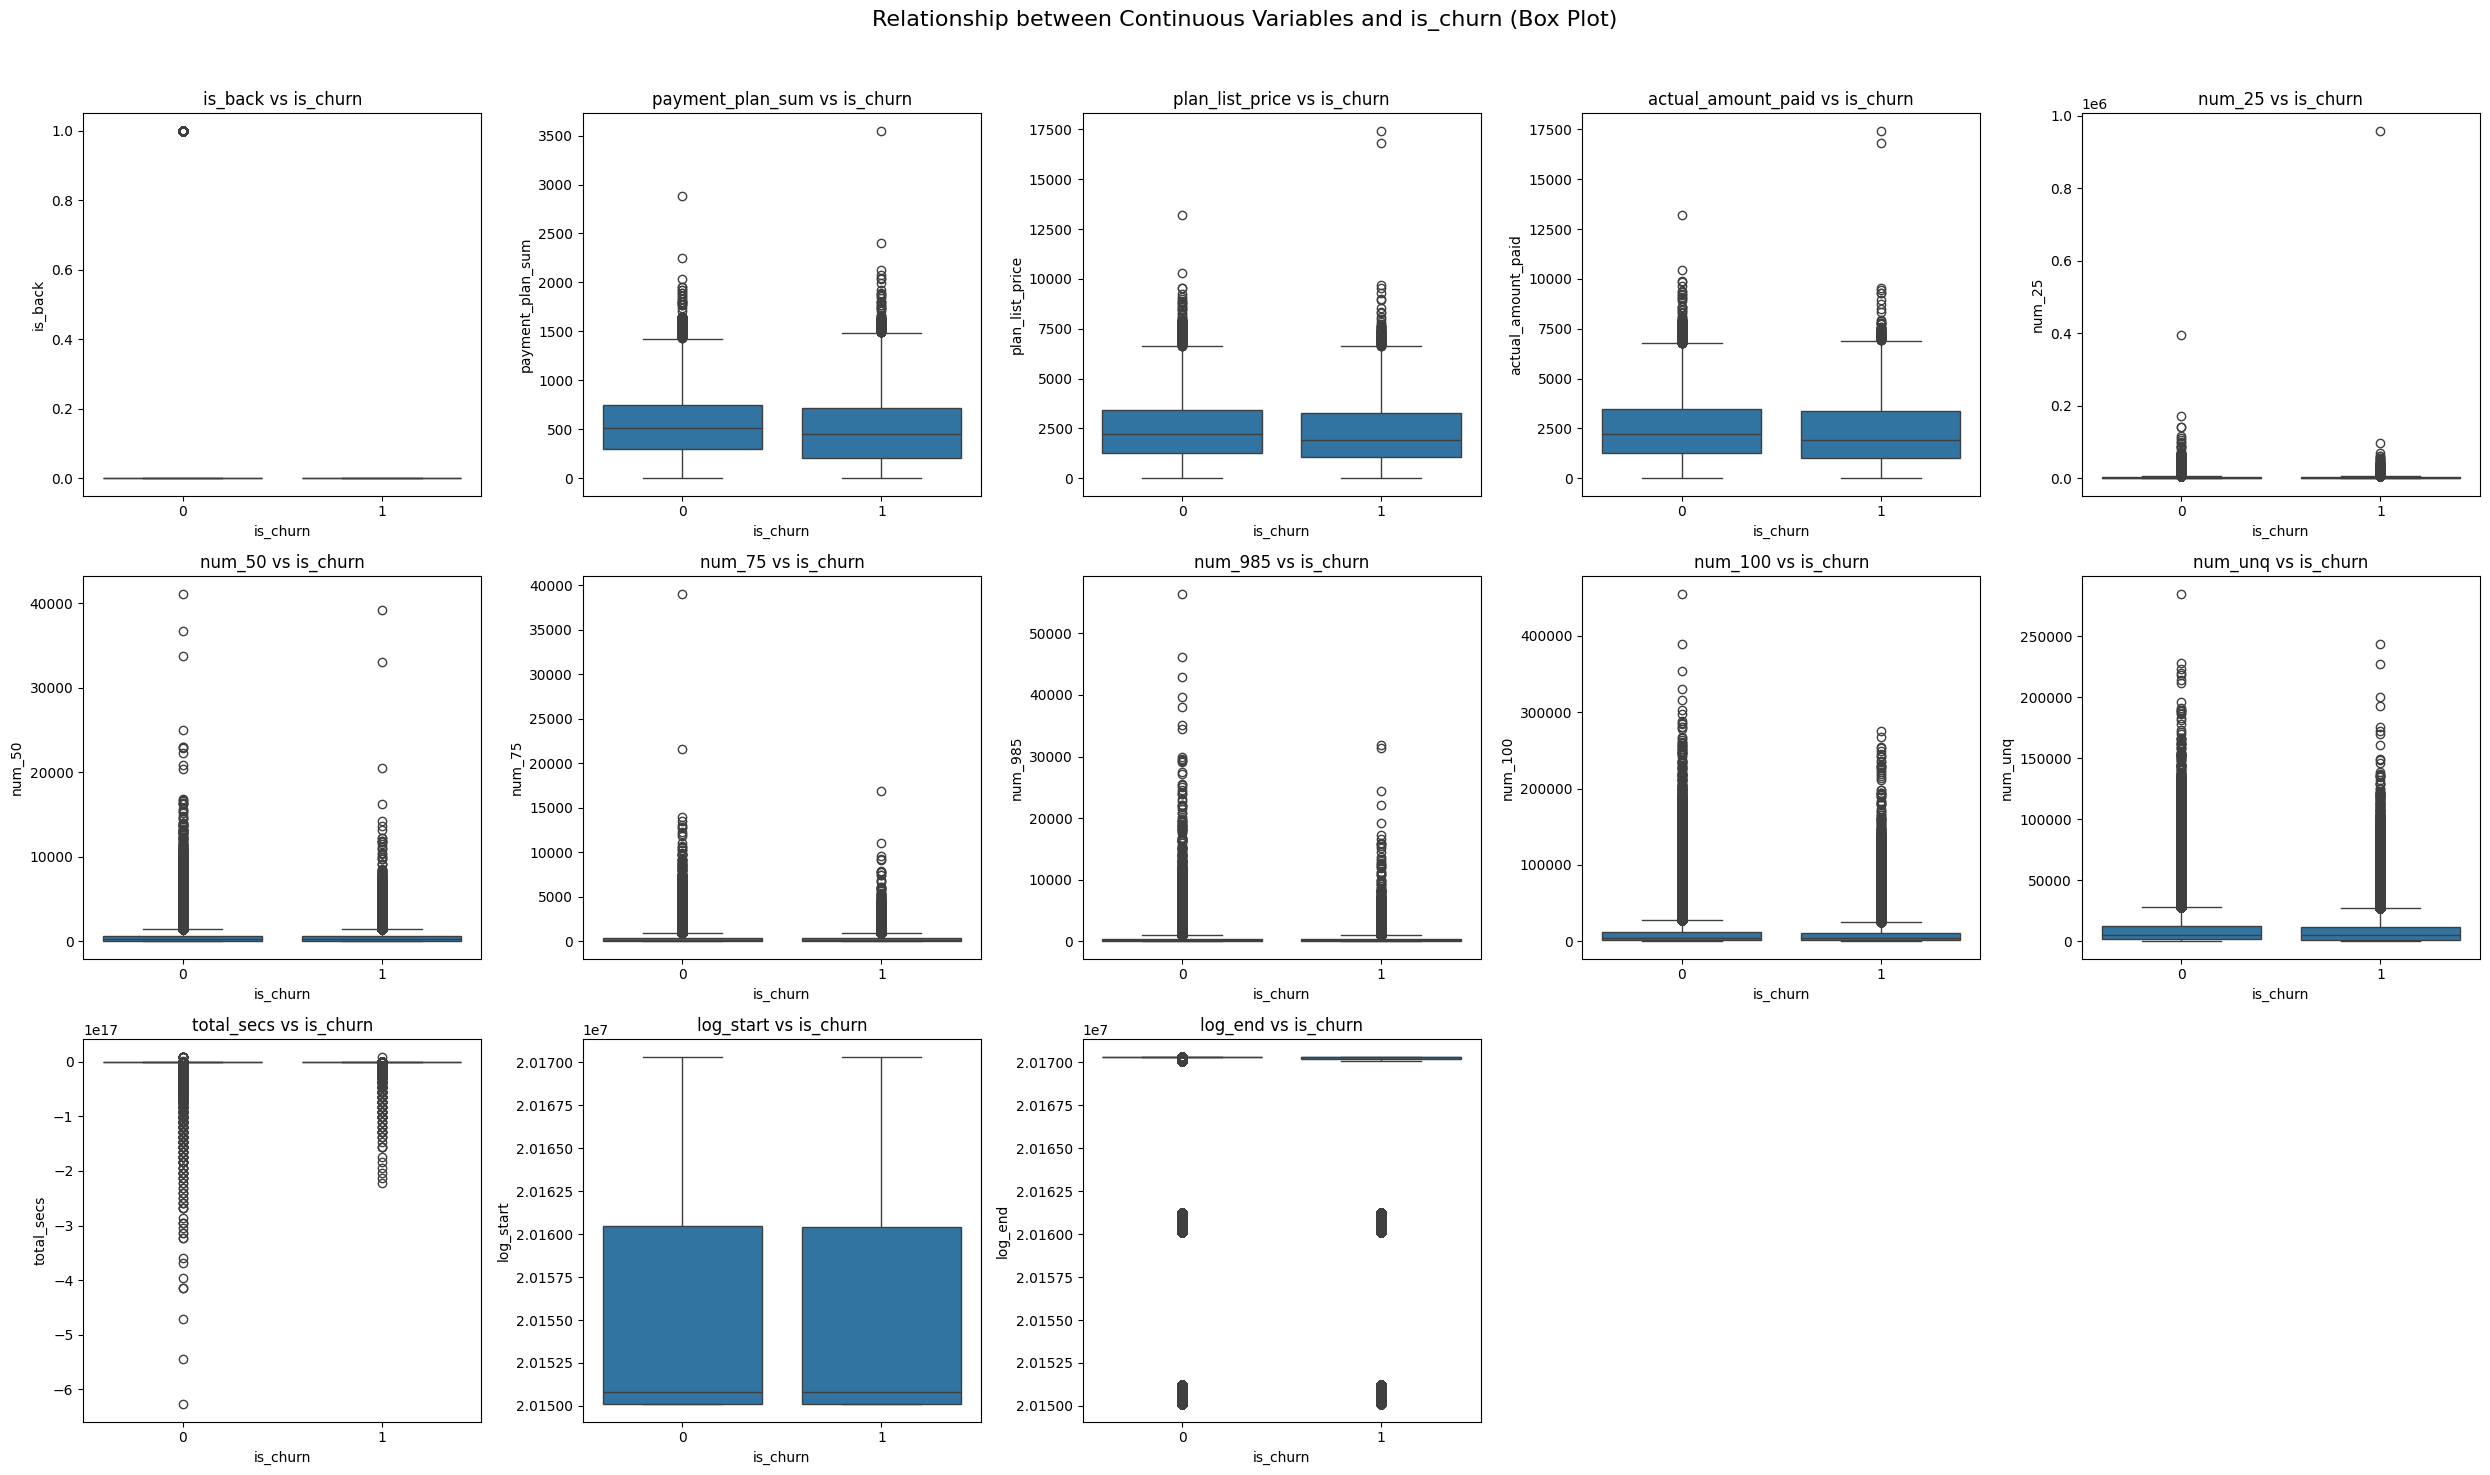

In [64]:
# 연속형 변수 목록
continuous_cols = ['is_back', 'payment_plan_sum', 'plan_list_price', 'actual_amount_paid', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'log_start', 'log_end']

num_vars = len(continuous_cols)
cols = 5  # 서브플롯의 열 개수
rows = math.ceil(num_vars / cols)  # 필요한 행 개수

fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
fig.suptitle("Relationship between Continuous Variables and is_churn (Box Plot)", fontsize=16)

for i, col in enumerate(continuous_cols):
    row, col_idx = divmod(i, cols)  # 현재 변수의 행, 열 인덱스 계산
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]  # 행이 1개일 경우 처리
    
    sns.boxplot(x='is_churn', y=col, data=df, ax=ax)
    ax.set_title(f'{col} vs is_churn')
    ax.set_xlabel('is_churn')
    ax.set_ylabel(col)

# 남은 빈 서브플롯 제거
for j in range(i + 1, rows * cols):
    row, col_idx = divmod(j, cols)
    fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

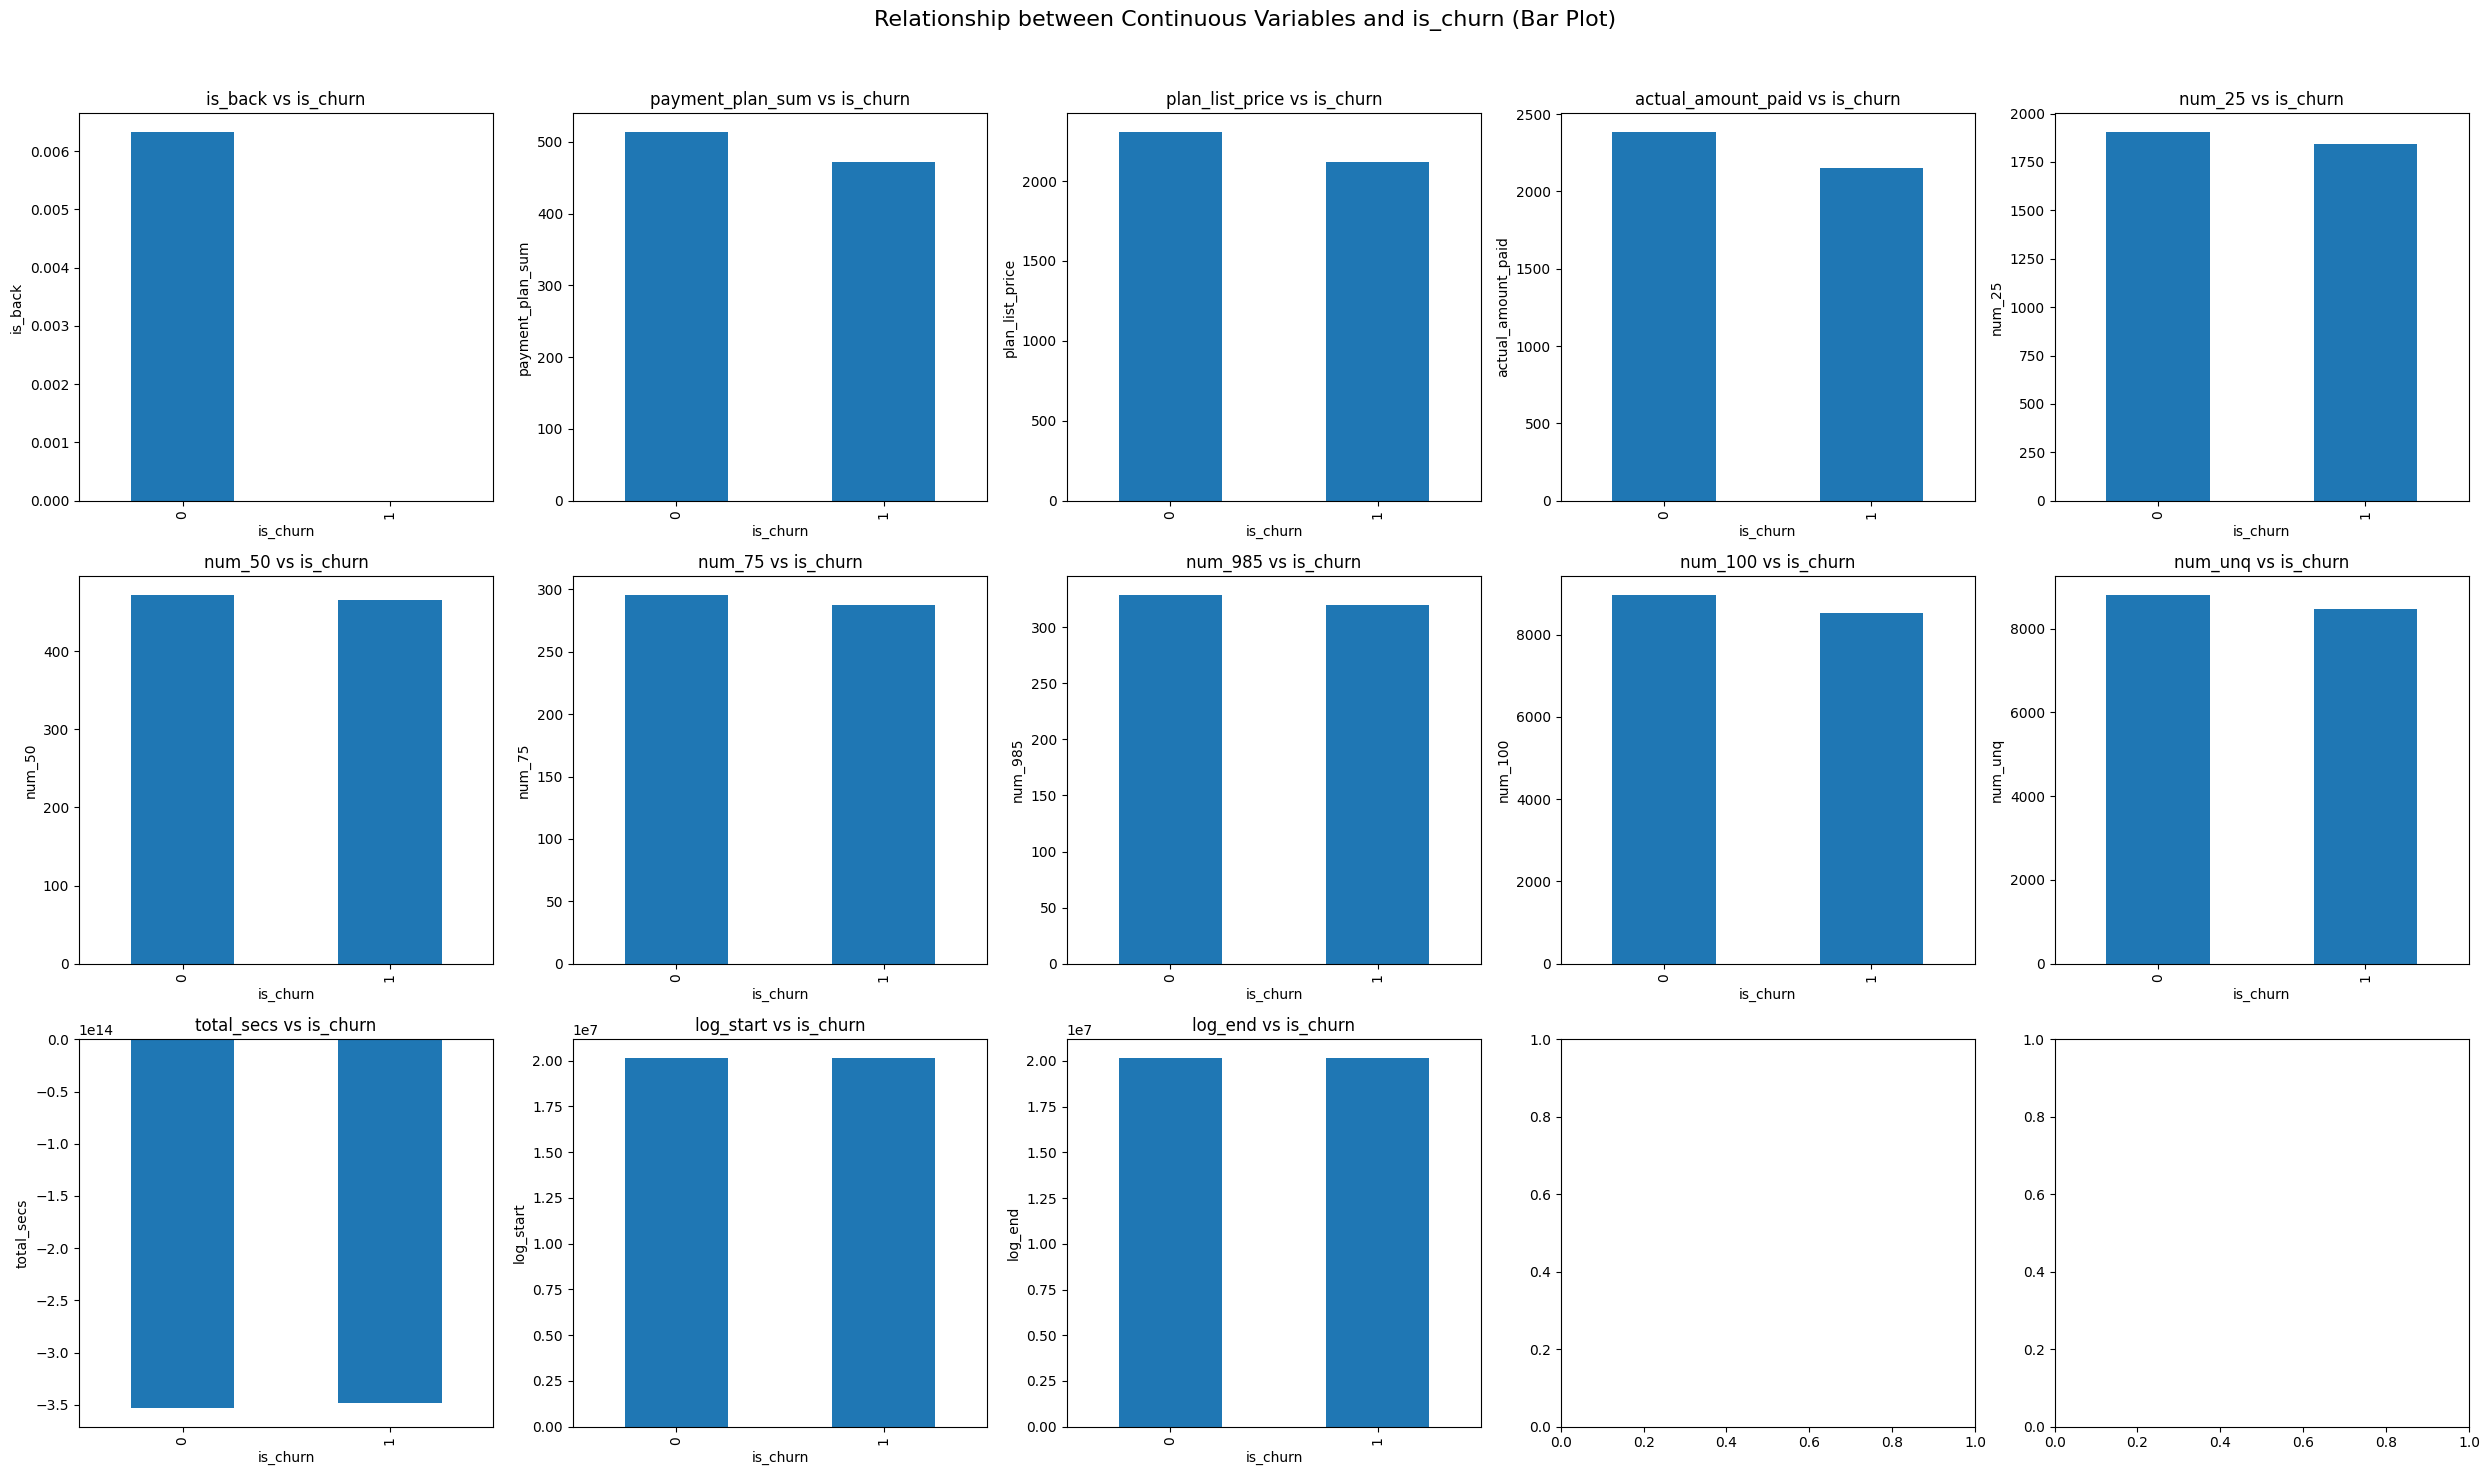

In [65]:
# 연속형 변수와 is_churn 변수 간의 관계를 막대 그래프로 시각화
continuous_cols = ['is_back', 'payment_plan_sum', 'plan_list_price', 'actual_amount_paid', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'log_start', 'log_end']

fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
fig.suptitle("Relationship between Continuous Variables and is_churn (Bar Plot)", fontsize=16)

for i, col in enumerate(continuous_cols):
    row, col_idx = divmod(i, cols)  # 현재 변수의 행, 열 인덱스 계산
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]  # 행이 1개일 경우 처리
    
    df.groupby('is_churn')[col].mean().plot(kind='bar', ax=ax)
    ax.set_title(f'{col} vs is_churn')
    ax.set_xlabel('is_churn')
    ax.set_ylabel(col)

# 남은 빈 서브플롯 제거
# for j in range(i + 1, rows * cols):
#     row, col_idx = divmod(j, cols)
#     fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

6   is_churn  (타겟 데이터)

7   is_back (재가입)

8   payment_plan_sum (아이디 별 총 구독 기간)

9   plan_list_price (아이디 별 예상 지불 금액)

10  actual_amount_paid (아이디 별 실제 지불 금액)

In [13]:
df['is_churn'].value_counts()

is_churn
0    837219
1    124212
Name: count, dtype: int64

In [14]:
df['is_back'].value_counts()

is_back
0    956164
1      5267
Name: count, dtype: int64

In [15]:
df['is_churn'][df['is_back'] == 1].value_counts()

is_churn
0    5267
Name: count, dtype: int64

In [16]:
df['payment_plan_sum'].value_counts()

payment_plan_sum
510     73007
780     48602
603     43010
810     39930
300     33398
        ...  
1607        1
1391        1
1627        1
216         1
1359        1
Name: count, Length: 1379, dtype: int64

In [25]:
df['payment_plan_sum'].value_counts().sort_index()

payment_plan_sum
0       1
1       9
2       3
3       2
6       1
       ..
2131    1
2250    1
2400    1
2882    1
3550    1
Name: count, Length: 1379, dtype: int64

In [26]:
df[df['payment_plan_sum'] == 0]

,msno_encoded,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,membership_expire_date,is_cancel,transaction_count
882370,6556106,4,52,male,9,20141205,1,0,0,0,1788,NaN,0.0,20170312,0.0,1


In [17]:
df['plan_list_price'].value_counts().sort_index()

plan_list_price
0        1055
1          22
35         16
50          1
70          7
         ... 
9705        1
10275       1
13186       1
16800       1
17433       1
Name: count, Length: 5378, dtype: int64

In [18]:
# 예상 지불가격이 0인 사람
aa = df[df['plan_list_price'] == 0]
aa['is_churn'].value_counts()

is_churn
1    1044
0      11
Name: count, dtype: int64

In [19]:
df['actual_amount_paid'].value_counts().sort_index()

actual_amount_paid
0        1126
1          22
35         16
50          1
70          7
         ... 
9872        1
10452       1
13186       1
16800       1
17433       1
Name: count, Length: 5506, dtype: int64

In [20]:
# 실제 지불가격이 0인 사람
aa = df[df['actual_amount_paid'] == 0]
aa['is_churn'].value_counts()

is_churn
1    1108
0      18
Name: count, dtype: int64

In [21]:
aa = df[df['actual_amount_paid'] != 0]
aa['plan_list_price'].value_counts().sort_index()

plan_list_price
0         2
1        22
35       16
50        1
70        7
         ..
9705      1
10275     1
13186     1
16800     1
17433     1
Name: count, Length: 5377, dtype: int64

In [67]:
df['num_25'].value_counts().sort_index()

num_25
0         2757
1         3834
2         3212
3         2794
4         2479
          ... 
141775       1
141799       1
172564       1
395313       1
958237       1
Name: count, Length: 19403, dtype: int64

In [68]:
df['num_50'].value_counts().sort_index()

num_50
0        11918
1         9678
2         7453
3         6123
4         5654
         ...  
33085        1
33803        1
36690        1
39211        1
41141        1
Name: count, Length: 6166, dtype: int64

In [72]:
df['num_75'].value_counts().sort_index()

num_75
0        19673
1        12562
2         9534
3         7980
4         7037
         ...  
13570        1
14012        1
16885        1
21646        1
39071        1
Name: count, Length: 4084, dtype: int64

In [71]:
df[df['num_75'] > 10000].value_counts().sort_index()

msno     city  bd  gender  registered_via  registration_init_time  is_churn  is_back  payment_plan_sum  plan_list_price  actual_amount_paid  discount_rate  is_auto_renew  membership_expire_date  is_cancel  transaction_count  num_25  num_50  num_75  num_985  num_100  num_unq  total_secs    log_start  log_end 
924034   15    25  0.0     3               20120527                0         0        675               3654             3654                0.0            0.000000       20170601                0.0        17                 95735   41141   21646   10238    32034    134018   1.821623e+07  20150101   20170331    1
1677830  15    20  0.0     3               20121125                0         0        540               2682             2682                0.0            0.500000       20170405                0.0        12                 35383   14555   10488   9128     20784    39569    1.024413e+07  20150101   20170331    1
1809960  15    23  1.0     9               20060118         

In [73]:
df['num_985'].value_counts().sort_index()

num_985
0        23197
1        12773
2         9328
3         7765
4         6934
         ...  
38067        1
39620        1
42861        1
46155        1
56454        1
Name: count, Length: 5474, dtype: int64

In [87]:
df[df['num_985'] > 15000]

,msno,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,log_start,log_end
146114,4042380,4,28,0.0,9,20141229,0,0,603,2980,...,21,679,681,964,16645,9336,23378,6666439.097,20150101,20170324
486226,1121307,5,32,1.0,7,20140927,0,0,810,3923,...,28,6606,3056,2948,16398,6562,20578,5808373.327,20150102,20170331
802490,4524786,6,0,NaN,4,20160205,1,0,510,2533,...,15,6943,1486,2935,15077,16900,19822,8036898.755,20160210,20170331
911128,4591168,13,28,1.0,9,20091102,0,0,603,2980,...,21,562,427,420,15221,9353,22279,6146871.933,20150101,20170329


In [75]:
df['num_100'].value_counts().sort_index()

num_100
0         10212
1          4432
2          2723
3          2171
4          1811
          ...  
315553        1
330871        1
354275        1
389616        1
455135        1
Name: count, Length: 59277, dtype: int64

In [76]:
df['num_unq'].value_counts().sort_index()

num_unq
1         2872
2         2258
3         1832
4         1641
5         1403
          ... 
223628       1
227572       1
228419       1
243703       1
285048       1
Name: count, Length: 54284, dtype: int64

### 전처리 과정

In [77]:
aa = df[df['payment_plan_sum'].isin([0, 2882, 3550])].index
df.drop(aa, inplace=True)
bb = df[df['plan_list_price'].isin([0, 13186, 16800, 17433])].index
df.drop(bb, inplace=True)
cc = df[df['plan_list_price'].isin([0, 13186, 16800, 17433])].index
df.drop(cc, inplace=True)

In [88]:
aa = df[df['num_25'] >= 20000].index
df.drop(aa, inplace=True)
bb = df[df['num_50'] >= 30000].index
df.drop(bb, inplace=True)
cc = df[df['num_75'] >= 10000].index
df.drop(cc, inplace=True)
dd = df[df['num_985'] >= 20000].index
df.drop(dd, inplace=True)
ee = df[df['num_100'] >= 35000].index
df.drop(ee, inplace=True)
ff = df[df['num_unq'] >= 24000].index
df.drop(ff, inplace=True)
gg = df[df['total_secs'] < 0].index
df.drop(gg, inplace=True)
df.drop(df[df['msno'] == 4524786].index, inplace=True)

In [89]:
df.shape

(860679, 25)

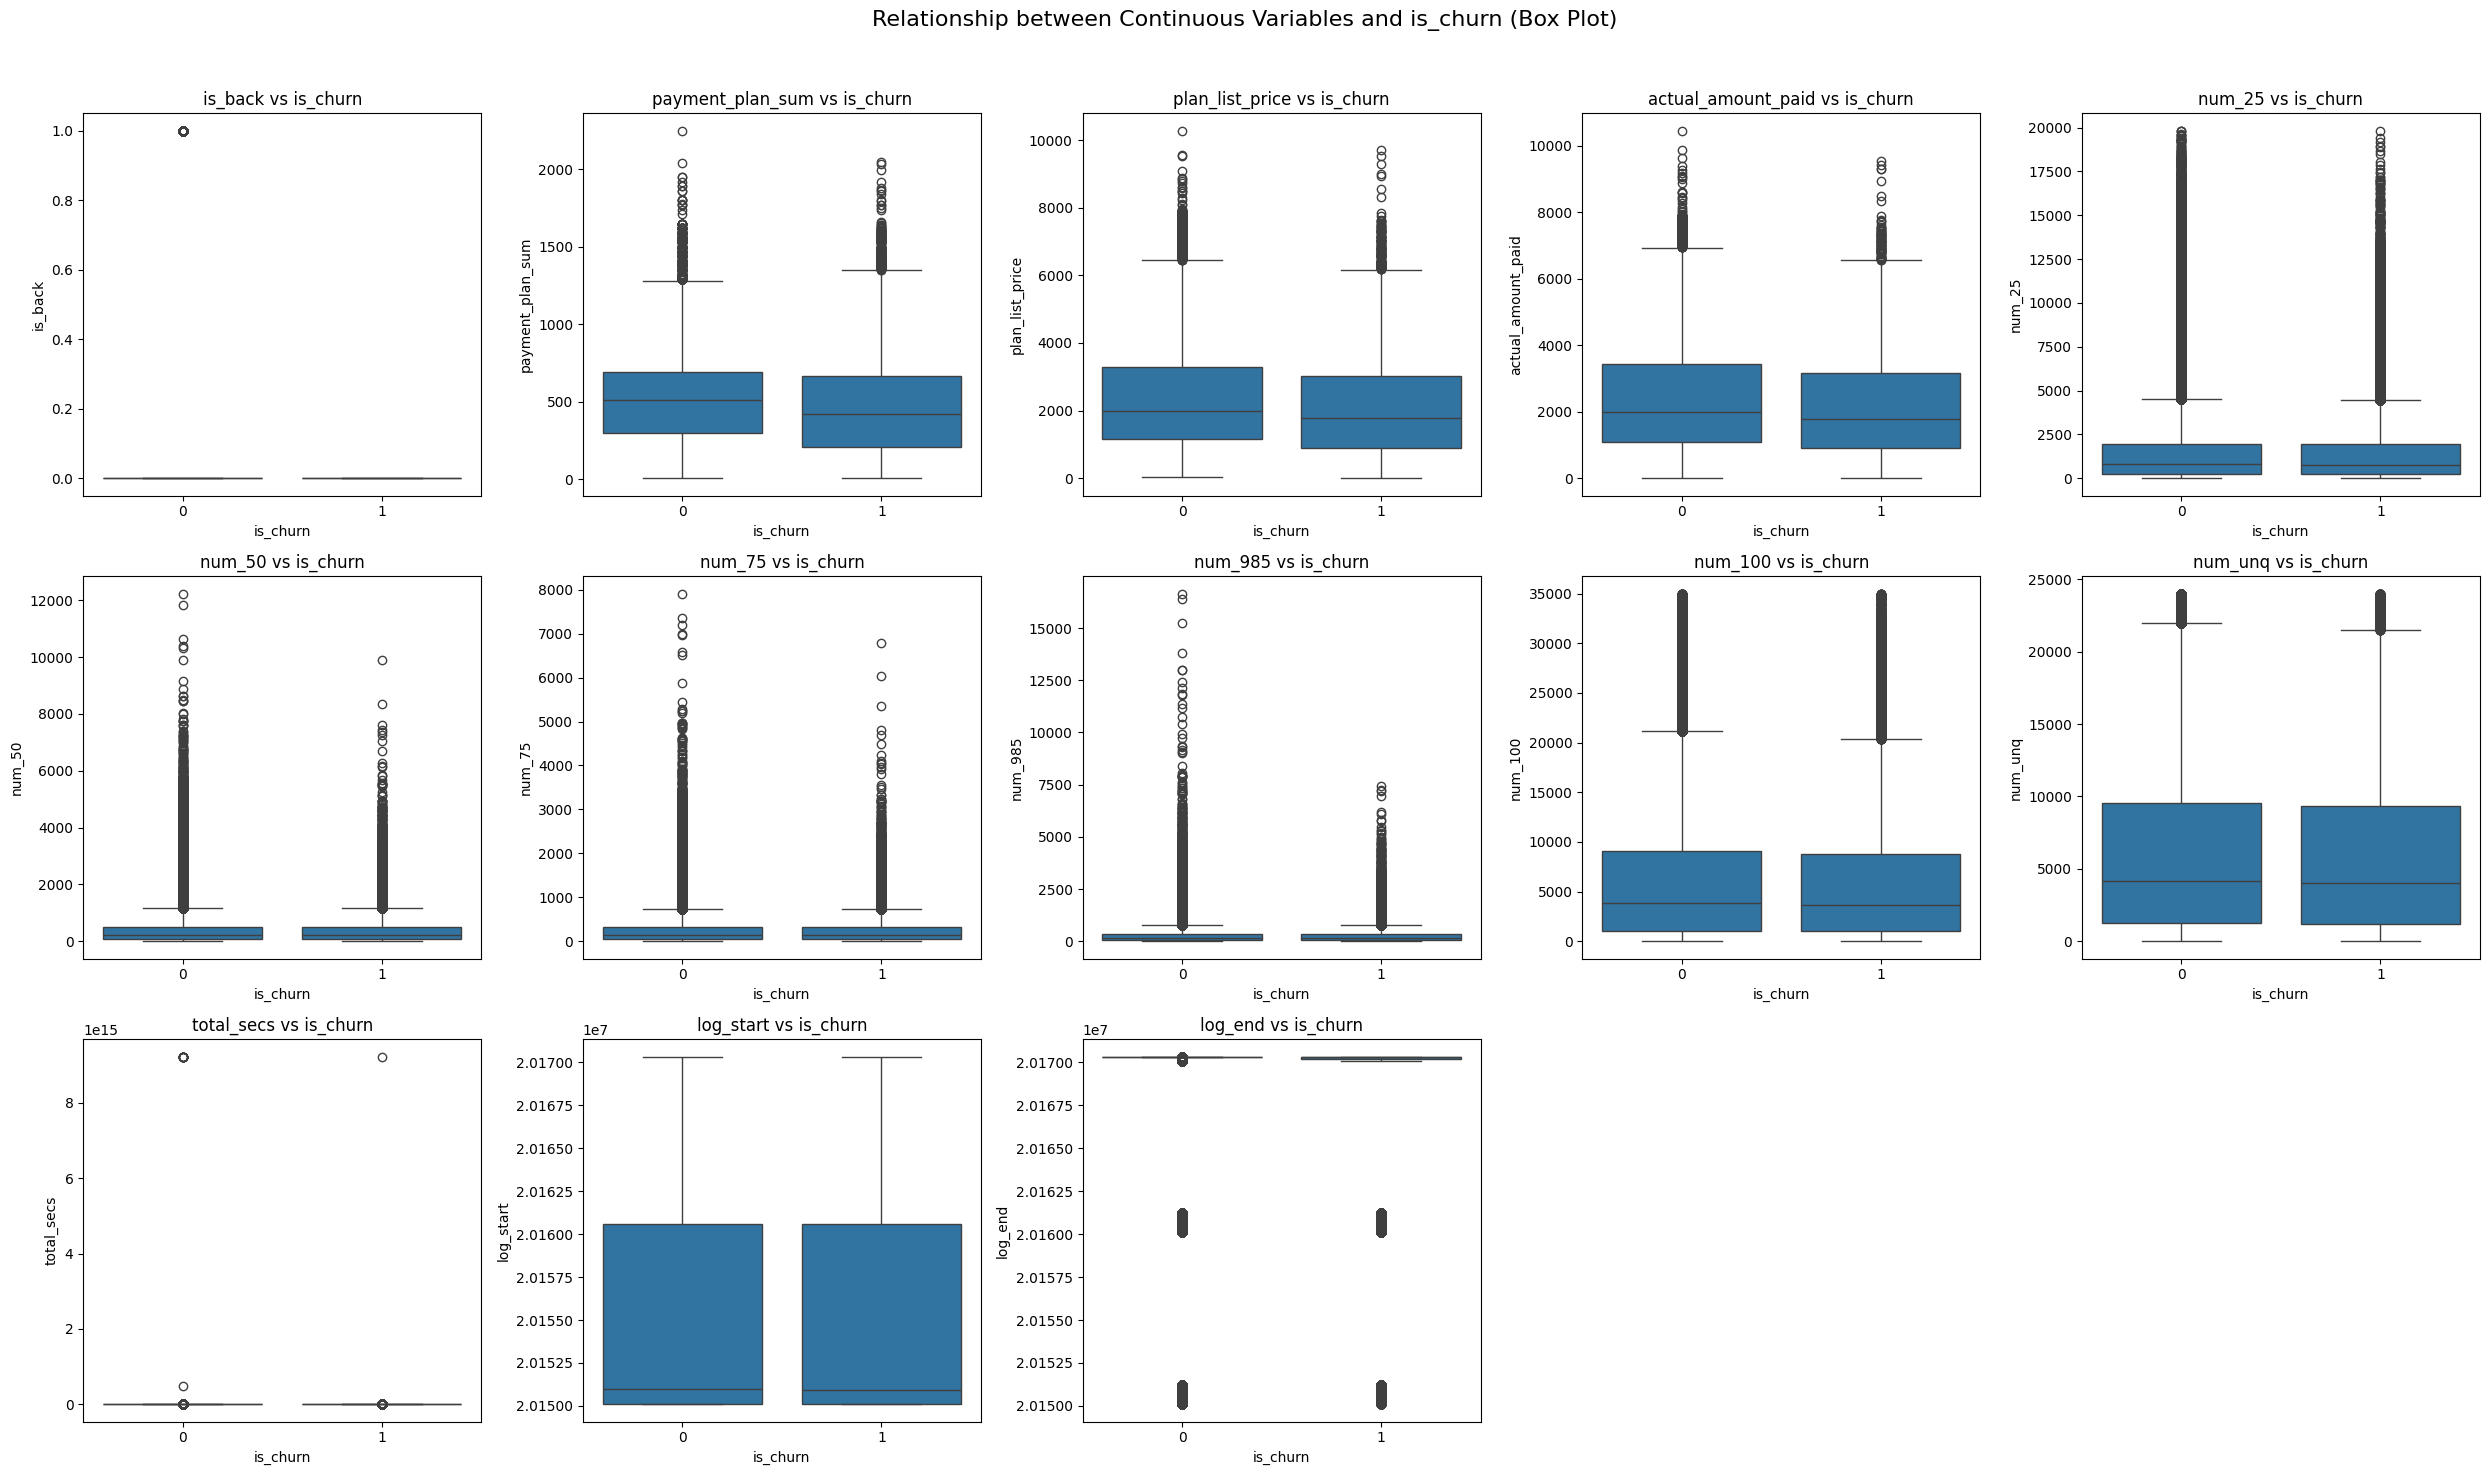

In [90]:
# 연속형 변수 목록
continuous_cols = ['is_back', 'payment_plan_sum', 'plan_list_price', 'actual_amount_paid', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'log_start', 'log_end']

num_vars = len(continuous_cols)
cols = 5  # 서브플롯의 열 개수
rows = math.ceil(num_vars / cols)  # 필요한 행 개수

fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
fig.suptitle("Relationship between Continuous Variables and is_churn (Box Plot)", fontsize=16)

for i, col in enumerate(continuous_cols):
    row, col_idx = divmod(i, cols)  # 현재 변수의 행, 열 인덱스 계산
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]  # 행이 1개일 경우 처리
    
    sns.boxplot(x='is_churn', y=col, data=df, ax=ax)
    ax.set_title(f'{col} vs is_churn')
    ax.set_xlabel('is_churn')
    ax.set_ylabel(col)

# 남은 빈 서브플롯 제거
for j in range(i + 1, rows * cols):
    row, col_idx = divmod(j, cols)
    fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()